In [7]:
from perceval.components import PS, BS
import perceval as pcvl

num_modes = 3
circuit = pcvl.Circuit(m = num_modes)
sum = - 1
for i in range(1, num_modes):
    for j in range(1, i + 1):
        sum += 1
        circuit = circuit // (num_modes - 2 - i + j, BS.H(pcvl.P(f'theta{sum}')))

circuit.U.tonp()

TypeError: Cannot convert expression to float

<IPython.core.display.Math object>

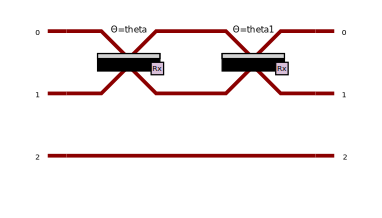

In [39]:
## to understand the conventions, you can note that a BS.Rx with the 4 phases phi (top left/right and bottom left/right) can be represented like that

bs_rx_circuit=pcvl.Circuit(3)  // BS(theta=pcvl.P('theta')) 

bs_rx_circuit = bs_rx_circuit // BS(theta = pcvl.P(f'theta{1}'))

pcvl.pdisplay(bs_rx_circuit.U)

# we can check it's the same as bs_rx.definition()
#pcvl.pdisplay(bs_rx_circuit)

## For this cell, we needed the syntax to builds circuits... Good transition !
pcvl.pdisplay(bs_rx_circuit)
